### Demonstrativos financeiros

Relatórios contábeis elaborados periodicamente pelas empresas. 
- Balanço Patrimonial Ativo (BPA)
- Balanço Patrimonial Passivo (BPP)
- Demonstração de Fluxo de Caixa - Método Direto (DFC-MD)
- Demonstração de Fluxo de Caixa - Método Indireto (DFC-MI)
- Demonstração das Mutações do Patrimônio Líquido (DMPL)
- Demonstração de Resultado Abrangente (DRA)
- Demonstração de Resultado (DRE)
- Demonstração de Valor Adicionado (DVA)

Uma companhia de capital aberto deve apurar as seguintes demonstrações em atendimento às exigências da Comissão de Valores Mobiliários (CVM), B3 e seus acionistas:

*Demonstrações Financeiras Padronizadas* (DFP) – Este documento é composto por todos os demonstrativos financeiros referentes ao exercício social encerrado, e deve ser encaminhado ao final de cada trimestre de cada ano à CVM e à B3. https://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp 
Deve ser entregue pelo emissor nacional em até 3 (três) meses contados do encerramento do exercício social ou na mesma data de envio das demonstrações financeiras, o que ocorrer primeiro.

*Informações e Resultados Trimestrais* (ITR) – São elaborados e enviados por todas as companhias listadas em Bolsa de Valores para a CVM e B3 todo trimestre. A ITR tem por finalidade permitir que o investidor acompanhe o desempenho da empresa no trimestre. https://dados.cvm.gov.br/dataset/cia_aberta-doc-itr
Deve ser entregue pelo emissor no prazo de 45 (quarenta e cinco) dias contados da data de encerramento
de cada trimestre.

In [2]:
anual = True

if anual :
    dreP = 'dfp'
else :
    dreP = 'itr'

ano_inicial = 2017
ano_final = 2023    

In [11]:
import pandas as pd # biblioteca para manipulação de dados e data frames
from zipfile import ZipFile # biblioteca para extrair arquivo zipados
import seaborn as sns
sns.set()
import os
import urllib.request

# Define a url dos dados da DFP
url_cvm = f'https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/{dreP.upper()}/DADOS/'

path_code = os.getcwd()
path_data = path_code+'/data'

if not os.path.exists(path_data):
        os.makedirs(path_data)

In [13]:
for ano in range(ano_inicial, ano_final + 1):
   url = url_cvm+f'{dreP}_cia_aberta_{ano}.zip'
   arquivo_local = os.path.join(path_data, os.path.basename(url))
   urllib.request.urlretrieve(url, arquivo_local)
#  # unzip
   ZipFile(path_data+'/'+f'{dreP}_cia_aberta_{ano}.zip', 'r').extractall('data')

In [ ]:
os.listdir(path_data)

In [25]:
planilhas = 'DRE_con'
dados_dre = pd.DataFrame()

for ano in range(ano_inicial, ano_final+1):
  arquivo_local = path_data+'/'+f'{dreP}_cia_aberta_{planilhas}_{ano}.csv'
  demonstracao = pd.read_csv(arquivo_local, sep = ';', decimal = ',', 
                              encoding = 'ISO-8859-1',dtype = {"ORDEM_EXERC": "category"}) 
  frames=[dados_dre,demonstracao]
  dados_dre = pd.concat(frames) 
  print(f'{dreP}_cia_aberta_{planilhas}_{ano}.csv')    

dados_dre.to_csv(f'DRE_{ano_inicial}-{ano_final}.csv', index = False) 

dfp_cia_aberta_DRE_con_2020.csv
dfp_cia_aberta_DRE_con_2021.csv
dfp_cia_aberta_DRE_con_2022.csv
dfp_cia_aberta_DRE_con_2023.csv


In [26]:
dre = pd.read_csv(f'DRE_{ano_inicial}-{ano_final}.csv')

In [120]:
dre.head(3)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2020-12-31,2,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2019-01-01,2019-12-31,3.01,Receitas de Intermediação Financeira,123105325.0,S
1,00.000.000/0001-91,2020-12-31,2,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-01-01,2020-12-31,3.01,Receitas de Intermediação Financeira,98659704.0,S
2,00.000.000/0001-91,2020-12-31,2,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2019-01-01,2019-12-31,3.01.01,Receita de Juros,123105325.0,N


### escolher empresa

In [28]:
busca='gerdau'
cvm = pd.read_csv(path_data+'/'+f'{dreP}_cia_aberta_{ano_final}.csv',sep=';',encoding = 'ISO-8859-1')
cvm[cvm['DENOM_CIA'].str.contains(busca.upper())][['DENOM_CIA','CD_CVM']]


,DENOM_CIA,CD_CVM
132,GERDAU S.A.,3980
188,METALURGICA GERDAU S.A.,8656


In [29]:
cod_cvm=8656

### escolher dados

In [149]:
try:
    tabela = pd.read_csv(path_data+'/'+f'{dreP}_cia_aberta_DRE_con_{ano_final}.csv', sep = ";", encoding = 'ISO-8859-1',dtype = {"ORDEM_EXERC": "category"})
except:
      import requests
      download = requests.get('https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/dfp_cia_aberta_2023.zip')
      open('dfp_cia_aberta_2023.zip', "wb").write(download.content)
      arquivo_zip = ZipFile('dfp_cia_aberta_2023.zip')
      tabela = pd.read_csv(arquivo_zip.open('dfp_cia_aberta_DRE_con_2023.csv'), sep = ";", encoding = 'ISO-8859-1', dtype = {"ORDEM_EXERC": "category"})  

tabela=tabela[(tabela.CD_CVM == cod_cvm)&(tabela.ORDEM_EXERC == 'ÚLTIMO')]

In [103]:
tabela.columns

Index(['CNPJ_CIA', 'DT_REFER', 'VERSAO', 'DENOM_CIA', 'CD_CVM', 'GRUPO_DFP',
       'MOEDA', 'ESCALA_MOEDA', 'ORDEM_EXERC', 'DT_INI_EXERC', 'DT_FIM_EXERC',
       'CD_CONTA', 'DS_CONTA', 'VL_CONTA', 'ST_CONTA_FIXA'],
      dtype='object')

In [150]:
tabela['DS_CONTA'].unique()

array(['Receita de Venda de Bens e/ou Serviços',
       'Custo dos Bens e/ou Serviços Vendidos', 'Resultado Bruto',
       'Despesas/Receitas Operacionais', 'Despesas com Vendas',
       'Despesas Gerais e Administrativas',
       'Perdas pela Não Recuperabilidade de Ativos',
       'Outras Receitas Operacionais',
       'Recuperação de empréstimos compulsórios Eletrobras',
       'Ganhos pela não recuperabilidade de ativos financeiros',
       'Outras Despesas Operacionais',
       'Perdas pela não recuperabilidade de ativos financeiros',
       'Perdas pela não recuperabilidade de ativos',
       'Resultado em operações com controlada e empresas controladas em conjunto',
       'Resultado de Equivalência Patrimonial',
       'Resultado Antes do Resultado Financeiro e dos Tributos',
       'Resultado Financeiro', 'Receitas Financeiras',
       'Ganhos com instrumentos financeiros, líquido',
       'Atualização de créditos tributários', 'Despesas Financeiras',
       'Variação Cambial,

In [140]:
from IPython.display import display, HTML
display(HTML(tabela[['CD_CONTA', 'DS_CONTA' , 'VL_CONTA']].to_html(index=False)))


CD_CONTA,DS_CONTA,VL_CONTA
3.01,Receita de Venda de Bens e/ou Serviços,68916447.00
3.02,Custo dos Bens e/ou Serviços Vendidos,-57583992.00
3.03,Resultado Bruto,11332455.00
3.04,Despesas/Receitas Operacionais,-922633.00
3.04.01,Despesas com Vendas,-716195.00
3.04.02,Despesas Gerais e Administrativas,-1507048.00
3.04.03,Perdas pela Não Recuperabilidade de Ativos,0.00
3.04.04,Outras Receitas Operacionais,1033872.00
3.04.04.01,Outras Receitas Operacionais,1033872.00
3.04.04.02,Recuperação de empréstimos compulsórios Eletrobras,0.00


In [144]:
tabela[(tabela['CD_CONTA'] == '3.01')][['CD_CONTA', 'DS_CONTA' , 'VL_CONTA' , 'ESCALA_MOEDA' , 'MOEDA']]#.drop_duplicates(subset=['DS_CONTA'])


,CD_CONTA,DS_CONTA,VL_CONTA,ESCALA_MOEDA,MOEDA
6031,3.01,Receita de Venda de Bens e/ou Serviços,68916447.0,MIL,REAL


In [145]:
tabela[(tabela['CD_CONTA'] == '3.02')][['CD_CONTA', 'DS_CONTA' , 'VL_CONTA' , 'ESCALA_MOEDA' , 'MOEDA']]#.drop_duplicates(subset=['DS_CONTA'])


,CD_CONTA,DS_CONTA,VL_CONTA,ESCALA_MOEDA,MOEDA
6033,3.02,Custo dos Bens e/ou Serviços Vendidos,-57583992.0,MIL,REAL


In [146]:
tabela[tabela['CD_CONTA'] == '3.11'][['CD_CONTA', 'DS_CONTA' , 'VL_CONTA' , 'ESCALA_MOEDA' , 'MOEDA']].drop_duplicates(subset=['DS_CONTA'])


,CD_CONTA,DS_CONTA,VL_CONTA,ESCALA_MOEDA,MOEDA
6103,3.11,Lucro/Prejuízo Consolidado do Período,7585094.0,MIL,REAL


In [147]:
tabela[tabela['CD_CONTA'] == '3.99.02.01'][['CD_CONTA', 'DS_CONTA' , 'VL_CONTA' , 'ESCALA_MOEDA' , 'MOEDA']]#.drop_duplicates(subset=['DS_CONTA'])


,CD_CONTA,DS_CONTA,VL_CONTA,ESCALA_MOEDA,MOEDA
6119,3.99.02.01,ON,2.48,MIL,REAL


### pegando dados da empresa

In [154]:
new_dre  = dre[(dre.CD_CVM == cod_cvm) & (dre.ORDEM_EXERC == 'ÚLTIMO')
               & (dre.CD_CONTA.isin(['3.11', '3.01', '3.02', '3.99.02.01']))]

In [155]:
# DRE
## Filtra as contas, a empresa e a ordem do exercício
new_dre[['DT_REFER', 'DS_CONTA', 'VL_CONTA']]


,DT_REFER,DS_CONTA,VL_CONTA
30525,2020-12-31,Receita de Venda de Bens e/ou Serviços,43814661.00
30527,2020-12-31,Custo dos Bens e/ou Serviços Vendidos,-37884102.00
30585,2020-12-31,Lucro/Prejuízo Consolidado do Período,2383590.00
30601,2020-12-31,ON,0.81
63025,2021-12-31,Receita de Venda de Bens e/ou Serviços,78345081.00
63027,2021-12-31,Custo dos Bens e/ou Serviços Vendidos,-57527721.00
63097,2021-12-31,Lucro/Prejuízo Consolidado do Período,15554098.00
63113,2021-12-31,ON,4.68
96617,2022-12-31,Receita de Venda de Bens e/ou Serviços,82412210.00
96619,2022-12-31,Custo dos Bens e/ou Serviços Vendidos,-63661156.00


In [158]:
# Tratamento dos dados para a visualização
sub_dre_pivot = new_dre[['DT_REFER', 'DS_CONTA', 'VL_CONTA' ]].pivot_table(index = 'DT_REFER', columns = 'DS_CONTA', values = 'VL_CONTA')
sub_dre_pivot.rename(columns={'ON':'LPA'},inplace=True)
sub_dre_pivot

DS_CONTA,Custo dos Bens e/ou Serviços Vendidos,Lucro/Prejuízo Consolidado do Período,LPA,Receita de Venda de Bens e/ou Serviços
DT_REFER,,,,
2020-12-31,-37884102.0,2383590.0,0.81,43814661.0
2021-12-31,-57527721.0,15554098.0,4.68,78345081.0
2022-12-31,-63661156.0,11462284.0,3.52,82412210.0
2023-12-31,-57583992.0,7585094.0,2.48,68916447.0


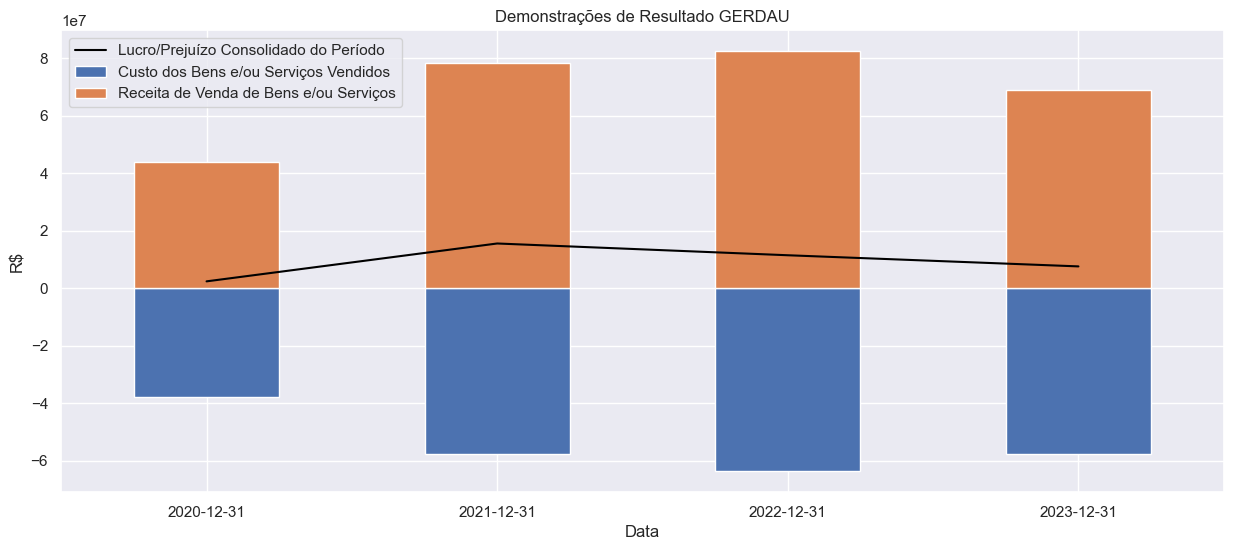

In [165]:
# Cria o gráfico da DRE
ax = sub_dre_pivot.drop(['LPA' , 'Lucro/Prejuízo Consolidado do Período'], axis = 1).plot(kind = 'bar', stacked = True) # retira a coluna de lucro/prejuízo e plota o gráfico de barras empilhados
g = sub_dre_pivot[['Lucro/Prejuízo Consolidado do Período']].plot(ax = ax, color = ['black'], figsize = (15, 6)) # usa somente a coluna de lucro/prejuiízo e plota

g.set(xlabel = 'Data', ylabel = 'R$', title = f'Demonstrações de Resultado {busca.upper()}')
g.legend(loc = 'best')

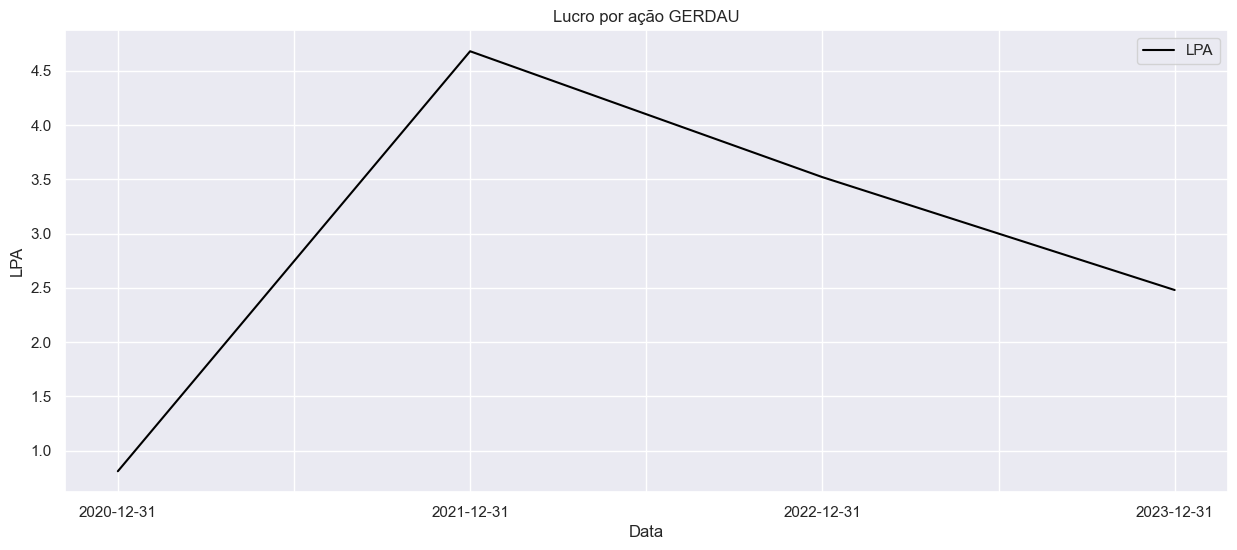

In [169]:
g = sub_dre_pivot[['LPA']].plot( color = ['black'], figsize = (15, 6)) 
g.set(xlabel = 'Data', ylabel = 'LPA', title = f'Lucro por ação {busca.upper()}')
g.legend(loc = 'best')

In [167]:
if input('delete ? : (s/n)') == 's' :
    import glob
    for f in glob.glob(f"data/{dreP}*.zip"):
        os.remove(f)   
    for f in glob.glob(f"data/{dreP}*.csv"):
        os.remove(f)   
